In [ ]:
!pip install datasets

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

## email-spam-classification dataset

https://huggingface.co/datasets/TrainingDataPro/email-spam-classification

### Load email-spam-classification dataset

In [154]:
from datasets import load_dataset

dataset = load_dataset("TrainingDataPro/email-spam-classification")

In [155]:
from sklearn.model_selection import train_test_split


emails = [title + " " + text for title, text in zip(dataset['train']['title'], dataset['train']['text'])]
labels = [1 if label == "spam" else 0 for label in dataset['train']['type']]

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.2, random_state=47)


### Vectorize text

In [156]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Logistic regression

In [157]:
from sklearn.linear_model import LogisticRegression


def logistic_regression(X_train_vec, y_train, X_test_vec, y_test):
  model = LogisticRegression(max_iter=1000, random_state=42)
  model.fit(X_train_vec, y_train)
  y_pred = model.predict(X_test_vec)
  return y_pred, accuracy_score(y_test, y_pred), classification_report(y_test, y_pred, output_dict=True)


### KNN

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


def knn(X_train_vec, y_train, X_test_vec, y_test):
  scaler = StandardScaler(with_mean=False)  # sparse matrix format

  X_train_scaled = scaler.fit_transform(X_train_vec)
  X_test_scaled = scaler.transform(X_test_vec)

  model = KNeighborsClassifier(n_neighbors=5)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)

  return y_pred, accuracy_score(y_test, y_pred), classification_report(y_test, y_pred, output_dict=True)


### Naive Bayes

In [159]:
from sklearn.naive_bayes import MultinomialNB


def naive_bayes(X_train_vec, y_train, X_test_vec, y_test):
  model = MultinomialNB()
  model.fit(X_train_vec, y_train)
  y_pred = model.predict(X_test_vec)

  return y_pred, accuracy_score(y_test, y_pred), classification_report(y_test, y_pred, output_dict=True)

### SVC

In [160]:
from sklearn.svm import SVC


def svm(X_train_vec, y_train, X_test_vec, y_test):
  model = SVC(kernel='linear', random_state=42)
  model.fit(X_train_vec, y_train)
  y_pred = model.predict(X_test_vec)

  return y_pred, accuracy_score(y_test, y_pred), classification_report(y_test, y_pred, output_dict=True)

### Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier


def random_forest(X_train_vec, y_train, X_test_vec, y_test):
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train_vec, y_train)
  y_pred = model.predict(X_test_vec)

  return y_pred, accuracy_score(y_test, y_pred), classification_report(y_test, y_pred, output_dict=True)

### Desicion tree

In [162]:
from sklearn.tree import DecisionTreeClassifier


def decision_tree(X_train_vec, y_train, X_test_vec, y_test):
  model = DecisionTreeClassifier(random_state=42)
  model.fit(X_train_vec, y_train)
  y_pred = model.predict(X_test_vec)

  return y_pred, accuracy_score(y_test, y_pred), classification_report(y_test, y_pred, output_dict=True)

### Evaluation

In [163]:
models = {
    "Logistic Regression": logistic_regression,
    "KNN": knn,
    "Naive Bayes": naive_bayes,
    "SVM": svm,
    "Random Forest": random_forest,
    "Decision Tree": decision_tree
}

In [ ]:
results = []

for model_name, model_func in models.items():
  y_pred, accuracy, class_report = model_func(X_train_vec, y_train, X_test_vec, y_test)
  results.append({
      "Model": model_name,
      "Accuracy": accuracy,
      "Precision (Spam)": class_report['1']['precision'],  # 0 = not spam
      "Recall (Spam)": class_report['1']['recall'],
      "F1-Score (Spam)": class_report['1']['f1-score'],
      "Precision (Not Spam)": class_report['0']['precision'],  # 1 = spam
      "Recall (Not Spam)": class_report['0']['recall'],
      "F1-Score (Not Spam)": class_report['0']['f1-score']
  })

In [165]:
results_df = pd.DataFrame(results)

In [166]:
results_df

,Model,Accuracy,Precision (Spam),Recall (Spam),F1-Score (Spam),Precision (Not Spam),Recall (Not Spam),F1-Score (Not Spam)
0,Logistic Regression,0.705882,0.666667,0.333333,0.444444,0.714286,0.909091,0.800000
1,KNN,0.352941,0.352941,1.000000,0.521739,0.000000,0.000000,0.000000
2,Naive Bayes,0.764706,0.750000,0.500000,0.600000,0.769231,0.909091,0.833333
3,SVM,0.647059,0.500000,0.500000,0.500000,0.727273,0.727273,0.727273
4,Random Forest,0.529412,0.000000,0.000000,0.000000,0.600000,0.818182,0.692308
5,Decision Tree,0.647059,0.500000,0.166667,0.250000,0.666667,0.909091,0.769231


Accuracy comparison

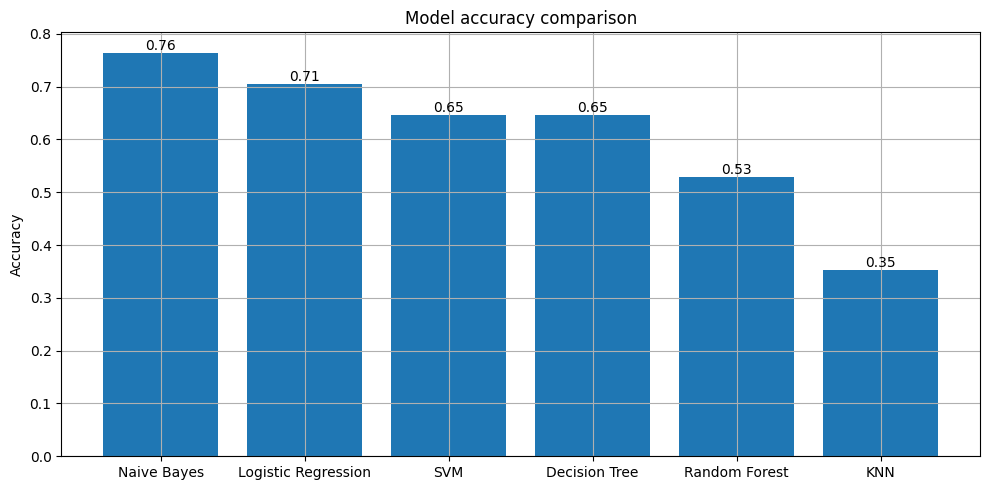

In [167]:
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 5))
bars = plt.bar(sorted_results_df['Model'], sorted_results_df['Accuracy'])

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2}', ha='center', va='bottom', fontsize=10)

plt.title('Model accuracy comparison')
plt.ylabel('Accuracy')
plt.grid()
plt.tight_layout()
plt.show()

## Kaggle dataset
https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset/data

### Load data

In [168]:
!kaggle datasets download -d purusinghvi/email-spam-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset
License(s): MIT
email-spam-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [182]:
import zipfile
import os


with zipfile.ZipFile('/content/email-spam-classification-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('kaggle_spam_ds')

In [183]:
kaggle_df = pd.read_csv( 'kaggle_spam_ds/combined_data.csv')
kaggle_df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [184]:
N = 10000

In [185]:
kaggle_df = kaggle_df.sample(n=N, random_state=42)

In [186]:
emails = kaggle_df['text']
labels = kaggle_df['label']

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.2, random_state=47)

### Vectorize text

In [187]:
vectorizer = CountVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Evaluation

In [188]:
results_kaggle_ds = []


for model_name, model_func in models.items():
  y_pred, accuracy, class_report = model_func(X_train_vec, y_train, X_test_vec, y_test)
  results_kaggle_ds.append({
      "Model": model_name,
      "Accuracy": accuracy,
      "Precision (Spam)": class_report['1']['precision'],
      "Recall (Spam)": class_report['1']['recall'],
      "F1-Score (Spam)": class_report['1']['f1-score'],
      "Precision (Not Spam)": class_report['0']['precision'],
      "Recall (Not Spam)": class_report['0']['recall'],
      "F1-Score (Not Spam)": class_report['0']['f1-score']
  })

In [189]:
results_kaggle_df = pd.DataFrame(results_kaggle_ds)

In [190]:
results_kaggle_df

,Model,Accuracy,Precision (Spam),Recall (Spam),F1-Score (Spam),Precision (Not Spam),Recall (Not Spam),F1-Score (Not Spam)
0,Logistic Regression,0.9750,0.963173,0.989331,0.976077,0.988310,0.959752,0.973822
1,KNN,0.5995,0.565490,0.963143,0.712594,0.844262,0.212590,0.339654
2,Naive Bayes,0.9705,0.990909,0.951503,0.970807,0.950495,0.990712,0.970187
3,SVM,0.9630,0.953555,0.975752,0.964525,0.973545,0.949432,0.961338
4,Random Forest,0.9725,0.971954,0.974782,0.973366,0.973085,0.970072,0.971576
5,Decision Tree,0.9435,0.947368,0.942774,0.945066,0.939425,0.944272,0.941843


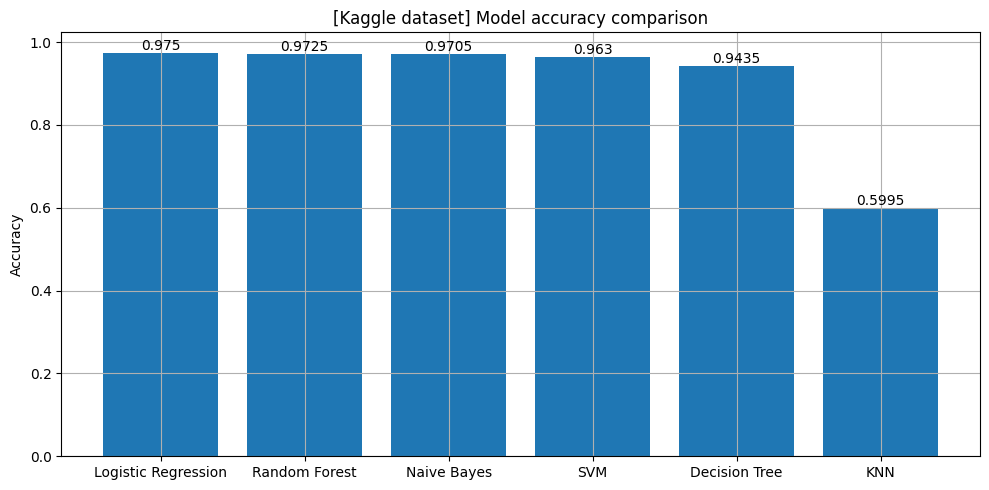

In [195]:
sorted_results_df = results_kaggle_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 5))
bars = plt.bar(sorted_results_df['Model'], sorted_results_df['Accuracy'])

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.4}', ha='center', va='bottom', fontsize=10)

plt.title('[Kaggle dataset] Model accuracy comparison')
plt.ylabel('Accuracy')
plt.grid()
plt.tight_layout()
plt.show()